## Description des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

client_id     date_id  dayNumber  IsWeekEnd  IsWeekDay  quantite  \
0           91  2021-01-01          5          0          1         1   
1           22  2021-01-01          5          0          1         3   
2           22  2021-01-01          5          0          1         4   
3           61  2021-01-01          5          0          1         2   
4           61  2021-01-01          5          0          1         2   
..         ...         ...        ...        ...        ...       ...   
431         42  2021-02-27          6          1          0         2   
432         42  2021-02-27          6          1          0         2   
433         83  2021-02-27          6          1          0         1   
434         21  2021-02-27          6          1          0         2   
435         77  2021-02-27          6          1          0         2   

     pizza_id             nom  prix  
0           2         Anchois    10  
1           7  Trois Fromages    13  
2           5         Chorizo    12  
3           1         Fromage    10  
4           6          Royale    13  
..        ...             ...   ...  
431         2         Anchois    10  
432         7  Trois Fromages    13  
433         6          Royale    13  
434         7  Trois Fromages    13  
435         3          Jambon    12  

[436 rows x 9 columns]

In [4]:
data.describe()

client_id   dayNumber   IsWeekEnd   IsWeekDay    quantite    pizza_id  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    50.821101    4.431193    0.314220    0.685780    2.082569    3.933486   
std     29.756098    1.451860    0.464738    0.464738    1.049387    1.955288   
min      1.000000    2.000000    0.000000    0.000000    1.000000    1.000000   
25%     23.750000    3.000000    0.000000    0.000000    1.000000    2.000000   
50%     52.000000    5.000000    0.000000    1.000000    2.000000    4.000000   
75%     77.000000    6.000000    1.000000    1.000000    3.000000    6.000000   
max    100.000000    6.000000    1.000000    1.000000    7.000000    7.000000   

             prix  
count  436.000000  
mean    11.672018  
std      1.158773  
min     10.000000  
25%     10.000000  
50%     12.000000  
75%     13.000000  
max     13.000000

In [5]:
data_final = data[['date_id', 'pizza_id', 'quantite']].groupby(['date_id', 'pizza_id']).mean()

## Répartition des données

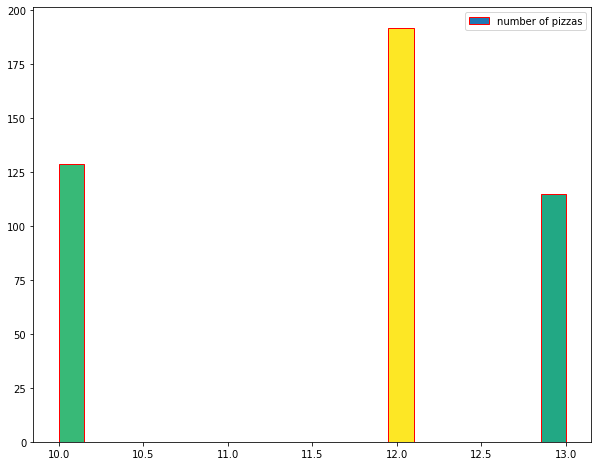

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
N, bins, patches = ax.hist(data["prix"], bins = 20, edgecolor='red', linewidth=1, label='number')
ax.legend(['number of pizzas'])
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

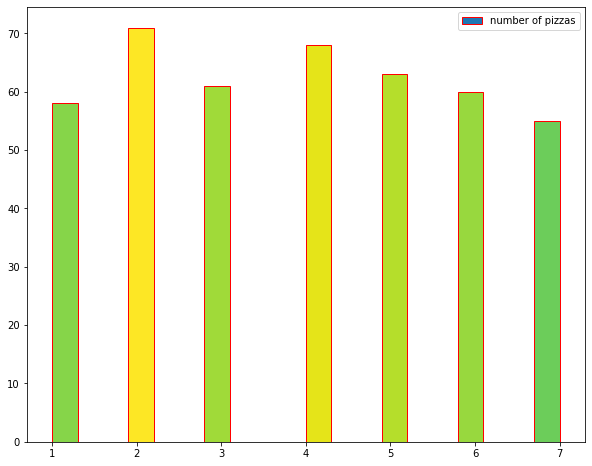

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
N, bins, patches = ax.hist(data["pizza_id"], bins = 20, edgecolor='red', linewidth=1, label='number')
ax.legend(['number of pizzas'])
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

## Correlation

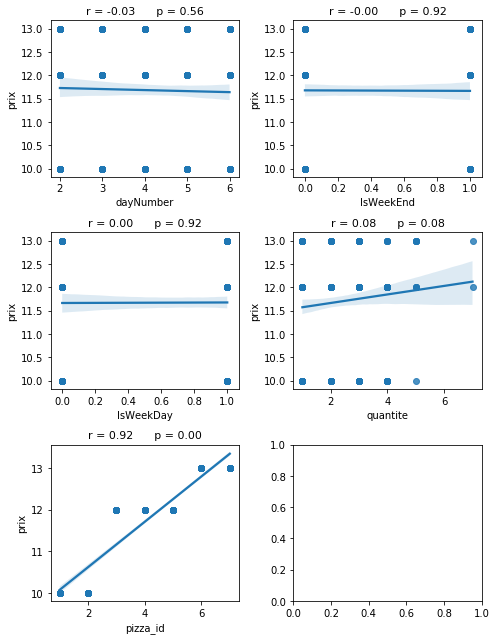

In [8]:
nr_rows = 3
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(data.dtypes[data.dtypes != "object"].index)
li_not_plot = ['client_id', 'prix']
li_plot_num_feats = [c for c in li_num_feats if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x=data[li_plot_num_feats[i]], y=data['prix'], ax = axs[r][c])
            stp = stats.pearsonr(data[li_plot_num_feats[i]], data['prix'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()  

# Model

In [9]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
X = pd.DataFrame(data_final.index.to_list())
X[0] = pd.to_datetime(X[0])
X['date_delta'] = (X[0] - X[0].min())  / np.timedelta64(1,'D')
X.drop(0, axis=1, inplace=True)
y = data_final["quantite"]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size=0.75)

R^2 is: 
 -0.10675393141681266
RMSE is: 
 0.4552743876642782


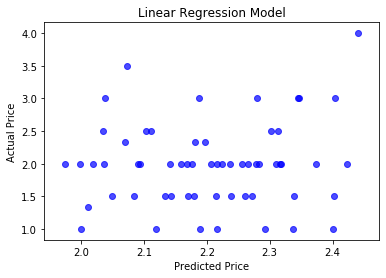

In [11]:
lr = linear_model.LinearRegression()

model = lr.fit(train_X, train_y)
predictions = model.predict(val_X)
print ("R^2 is: \n", model.score(val_X, val_y))
print ('RMSE is: \n', mean_squared_error(val_y, predictions))
plt.scatter(predictions, val_y, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [12]:
model.predict([[1, 58]])
print(train_y)

date_id     pizza_id
2021-01-12  2           1.000000
2021-02-26  5           1.500000
2021-01-20  3           2.000000
2021-01-06  3           2.000000
2021-01-28  1           1.333333
                          ...   
2021-01-16  5           2.000000
2021-02-18  7           7.000000
2021-01-29  2           1.500000
2021-01-12  6           4.500000
2021-02-13  2           2.000000
Name: quantite, Length: 176, dtype: float64
